In [6]:
import torch
import torchaudio
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nnAudio.features import MelSpectrogram

In [7]:
def extract_mel_spectrogram_transformer(sample_rate):
    """
    创建并返回Mel频谱图变换对象。
    
    Mel频谱图是一种基于人类听觉感知的频率表示方法，使用Mel刻度来模拟
    人耳对不同频率的敏感度。低频部分分辨率更高，高频部分分辨率较低。
    
    Args:
        sample_rate (int): 音频采样率，决定了频谱分析的频率范围
    
    Returns:
        Spectrogram.MelSpectrogram: 初始化完成的Mel频谱图对象
        
    参数说明:
        - sr: 采样率
        - n_fft: FFT窗口大小，影响频率分辨率
        - n_mels: Mel滤波器组数量，对应输出的频率维度
        - hop_length: 帧移，控制时间分辨率
        - window: 窗函数类型
        - center: 是否对信号进行中心填充
        - pad_mode: 填充模式，'reflect'进行镜像填充
        - power: 功率谱指数，2.0表示功率谱
        - htk: 是否使用HTK Mel刻度公式
        - fmin/fmax: 频率范围限制
        - norm: 归一化方式
        - trainable_mel/trainable_STFT: 是否允许训练过程中调整参数
    """
    # 初始化Mel频谱图变换对象
    mel_spectrogram_transformer = MelSpectrogram(
        sr=sample_rate,
        n_fft=2048,
        n_mels=128,
        hop_length=512,
        window='hann',
        center=True,
        pad_mode='reflect',
        power=2.0,
        htk=False,
        fmin=20,
        fmax=None,
        norm=1,
        trainable_mel=False,
        trainable_STFT=False, 
        verbose=False
    )
    return mel_spectrogram_transformer

In [8]:
def save_mel_to_csv(mel_spectrogram, output_csv):
    """
    将Mel频谱特征保存为CSV文件
    :param mel_spectrogram: Mel特征矩阵
    :param output_csv: CSV文件路径
    """
    df = pd.DataFrame(mel_spectrogram)
    df.to_csv(output_csv, index=False, header=False)
    print(f"Mel特征已保存至 {output_csv}")

In [9]:
def plot_mel_spectrogram(mel_spectrogram_data, sr, output_image=None):
    """
    可视化Mel频谱
    :param mel_spectrogram: Mel频谱矩阵
    :param sr: 采样率
    :param output_image: 如果提供路径，则保存图片
    """
    plt.figure(figsize=(12, 8))

    librosa.display.specshow(mel_spectrogram_data, sr=sr, hop_length=512, x_axis='time', y_axis='mel')

    plt.title("Mel Spectrogram(Hz)")
    plt.xlabel("Time(s)")
    plt.ylabel("Mel Frequency")
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()

    if output_image:
        plt.savefig(output_image)
        print(f"Mel频谱图已保存至 {output_image}")
    else:
        plt.show()

Mel特征已保存至 mel_features.csv
Mel频谱图已保存至 mel_spectrogram.png


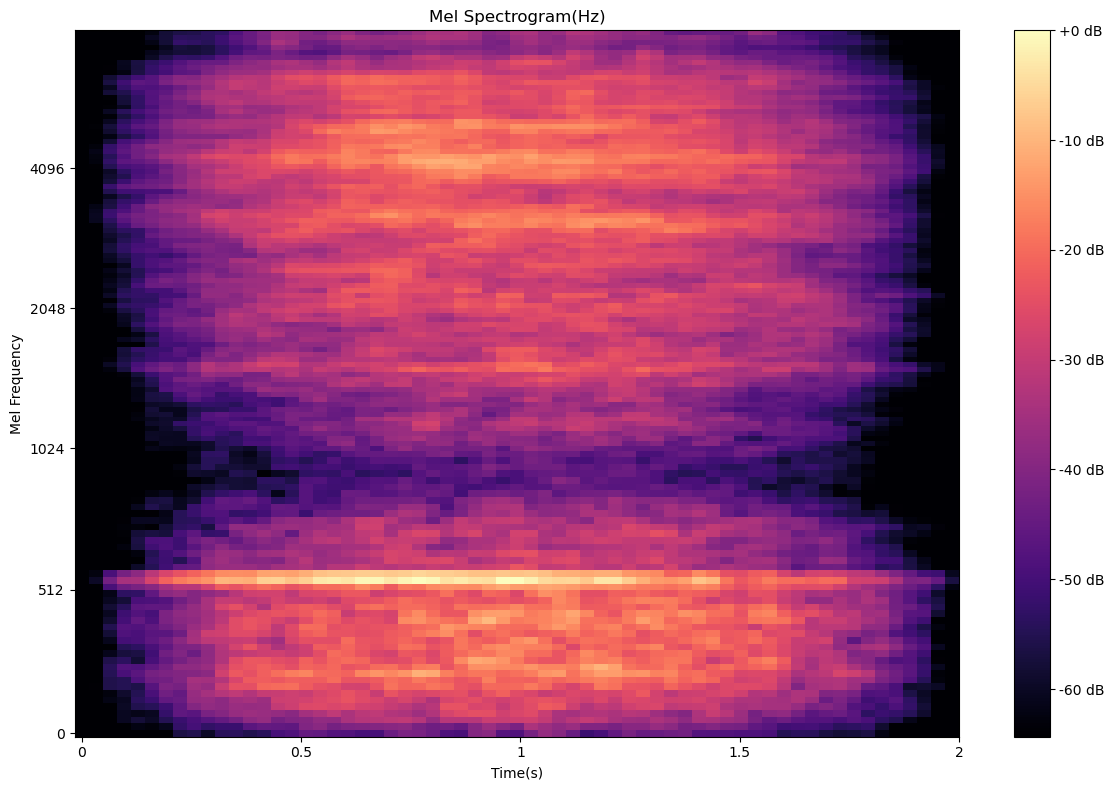

In [ ]:
wav_file = r"E:\数据集\ShipEar\data_preprocessing\4_Frame_Windows_2s_50%\6__10_07_13_marDeCangas_Entra_18.wav"  # 请替换为WAV文件路径
output_csv = "mel_features.csv"
output_image = "mel_spectrogram.png"

waveform, original_sr = torchaudio.load(wav_file)

# 重采样
target_sr = 16000
if original_sr != target_sr:
    resampler = torchaudio.transforms.Resample(original_sr, target_sr)
    waveform = resampler(waveform)

# 创建Mel频谱图的transformer
mel_spectrogram_transformer = extract_mel_spectrogram_transformer(target_sr)
mel_spectrogram = mel_spectrogram_transformer(waveform)
mel_spectrogram_data = mel_spectrogram.detach().cpu().numpy()[0]

# 转换为dB scale
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram_data , ref=np.max)

# 保存为CSV
save_mel_to_csv(mel_spectrogram_db, output_csv)

# 显示并保存Mel频谱图
plot_mel_spectrogram(mel_spectrogram_db, target_sr, output_image)